- Komang
- Bayu
- Yasmin

# **Import Library**

In [1]:
# Google Drive Public File/Folder Downloader
# https://pypi.org/project/gdown/
# https://github.com/wkentaro/gdown
!pip install gdown -q -U

# TFJS converter
!pip install -q tensorflowjs

In [2]:
import json
import gdown
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
# from tensorflow import keras
# from scipy.sparse import csr_matrix
# from sklearn.neighbors import NearestNeighbors
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.feature_extraction.text import TfidfVectorizer

# **Import Dataset**

- [How to download Google Drive file using Gdown in Python](https://github.com/wkentaro/gdown?tab=readme-ov-file#via-python)
- [How to download Google Drive file using Gdown in terminal command](https://github.com/wkentaro/gdown?tab=readme-ov-file#via-command-line)
- [How to use Python variable in Google Colab terminal command?](https://stackoverflow.com/questions/52851718/how-to-use-python-variables-in-google-colab-terminal-command)

In [3]:
# File ID from Google Drive link
base_url = "https://drive.google.com/uc?id={id}"
file_id = {
    "old_users_data"              : "16ngL0bfyQqucpYIffxkKiCa3qSGhR26S",
    # "new_tourism_with_id_links"   : "10vsiQ3A3kxRkPrIR0rn_qR0ySZ368Pck", # Banyak
    "new_tourism_with_id_links"   : "1jMd_Sj7t3EvONIJDzg8XuqfcT079LpCa", # Sedikit
    "new_tourism_rating_comments" : "1o-phm0eE64NulxzTLM_FWCyiMbfPHsYt",
    "package_tourism"             : "1LtPNXAnkJde03TFHJXqhIbKvtI_FXJxC"
}

# Download all the dataset file using gdown
for filename, id in file_id.items():
  gdown.download(id=id, output=f"{filename}.csv")      # Using Python
  # !gdown {base_url.format(id=id)} -O {filename}.csv  # Using terminal command

Downloading...
From: https://drive.google.com/uc?id=16ngL0bfyQqucpYIffxkKiCa3qSGhR26S
To: /content/old_users_data.csv
100%|██████████| 17.6k/17.6k [00:00<00:00, 28.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jMd_Sj7t3EvONIJDzg8XuqfcT079LpCa
To: /content/new_tourism_with_id_links.csv
100%|██████████| 430k/430k [00:00<00:00, 20.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o-phm0eE64NulxzTLM_FWCyiMbfPHsYt
To: /content/new_tourism_rating_comments.csv
100%|██████████| 906k/906k [00:00<00:00, 32.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LtPNXAnkJde03TFHJXqhIbKvtI_FXJxC
To: /content/package_tourism.csv
100%|██████████| 9.89k/9.89k [00:00<00:00, 15.5MB/s]


In [4]:
# Load all dataset in Pandas DataFrame
user_df = pd.read_csv("old_users_data.csv")
tourism_df = pd.read_csv("new_tourism_with_id_links.csv")
rating_df = pd.read_csv("new_tourism_rating_comments.csv")
package_df = pd.read_csv("package_tourism.csv")

In [5]:
print("old_users_data.csv"),               display(user_df.sample(3)),     print("\n")
print("new_tourism_rating_comments.csv"),  display(rating_df.sample(3)),   print("\n")
print("package_tourism.csv"),              display(package_df.sample(3)),  print("\n")
print("new_tourism_with_id_links.csv"),    display(tourism_df.sample(3))

old_users_data.csv


User_Id        Full_Name  Age                         Email    Password
55        56   Avivah Costley   18  acostley1j@deliciousdays.com   nA2"!Qxy9
266      267  Almire Stanlack   31    astanlack7e@purevolume.com  kZ2$Pa.=0X
44        45     Ford Turnell   25        fturnell18@example.com  lD3/{?VvEG



new_tourism_rating_comments.csv


User_Id  Place_Id  Place_Ratings  \
922        30       226              4   
5216      164       129              3   
5125      161        30              4   

                                                Comment  
922   Nyaman banget di Kawasan Punclut, walaupun gak...  
5216  Kalau cuma buat foto-foto, Bukit Lintang Sewu ...  
5125  Taman Menteng itu bagus banget, tapi ada beber...



package_tourism.csv


Package        City                   Place_Tourism1  \
21       22  Yogyakarta          Air Terjun Kedung Pedut   
98       99    Surabaya  Taman Ekspresi Dan Perpustakaan   
39       40  Yogyakarta                Pasar Beringharjo   

                           Place_Tourism2                  Place_Tourism3  \
21  Puncak Gunung Api Purba - Nglanggeran             Watu Mabur Mangunan   
98                Museum De Javasche Bank  Surabaya Museum (Gedung Siola)   
39           Pasar Kebon Empring Bintaran     Kawasan Wisata Sosrowijayan   

                   Place_Tourism4                    Place_Tourism5  
21  Geoforest Watu Payung Turunan                               NaN  
98            Museum Mpu Tantular  Taman Air Mancur Menari Kenjeran  
39                            NaN                               NaN



new_tourism_with_id_links.csv


Place_Id               Place_Name  \
418       419    Monumen Tugu Pahlawan   
99        100  Taman Budaya Yogyakarta   
188       189          Pantai Nguluran   

                                        Category  \
418                 Budaya, Teater & Pertunjukan   
99   Budaya, Teater & Pertunjukan, Taman Hiburan   
188                                       Bahari   

                                           Description        City  Price  \
418  Tugu Pahlawan (bahasa Indonesia: Tugu Pahlawan...    Surabaya      0   
99   Taman Budaya Yogyakarta (TBY) (Hanacaraka:ꦠꦩꦤ꧀...  Yogyakarta      0   
188  Di pantai Nguluran anda hanya bisa melihat ham...  Yogyakarta  10000   

    Rating  Time_Minutes                                     Coordinate  \
418    4,7          30.0  {'lat': -7.246925999999999, 'lng': 112.73781}   
99     4,5         210.0        {'lat': -7.8001041, 'lng': 110.3676579}   
188    4,1           NaN        {'lat': -8.1060061, 'lng': 110.4618655}   

          Lat        Long                                         Img_Path_0  \
418 -7.246926  112.737810  images_output\Monumen Tugu Pahlawan\Monumen Tu...   
99  -7.800104  110.367658  images_output\Taman Budaya Yogyakarta\Taman Bu...   
188 -8.106006  110.461866  images_output\Pantai Nguluran\Pantai Nguluran_...   

                                            Img_Path_1  \
418  images_output\Monumen Tugu Pahlawan\Monumen Tu...   
99   images_output\Taman Budaya Yogyakarta\Taman Bu...   
188  images_output\Pantai Nguluran\Pantai Nguluran_...   

                                            Img_Path_2  
418                                                NaN  
99   images_output\Taman Budaya Yogyakarta\Taman Bu...  
188                                                NaN

(None, None)

# **Data Assessment**


## **user_df**

In [6]:
user_df.sample(5)

User_Id        Full_Name  Age                     Email         Password
183      184     Candace Flay   30       cflay53@twitpic.com  cU4&gv1SRN$p}+h
28        29   Tamara Gladdor   34      tgladdors@netlog.com   sG3$f#M3yYTet'
45        46      Saree Beves   38  sbeves19@miibeian.gov.cn     wA7%9nVGc!MV
43        44   Andrus Yarrall   21      ayarrall17@google.ru        eE6*SFoJN
144      145  Mikaela Bartles   37  mbartles40@clickbank.net   kJ3`}Z.Nr+X+78

In [7]:
print(user_df.info())
user_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User_Id    300 non-null    int64 
 1   Full_Name  300 non-null    object
 2   Age        300 non-null    int64 
 3   Email      300 non-null    object
 4   Password   300 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.8+ KB
None


User_Id      0
Full_Name    0
Age          0
Email        0
Password     0
dtype: int64

## **tourism_df**

In [8]:
tourism_df.sample(3)

Place_Id                             Place_Name       Category  \
187       188                        Pantai Sadranan         Bahari   
357       358                  Masjid Kapal Semarang  Tempat Ibadah   
138       139  Puncak Gunung Api Purba - Nglanggeran     Cagar Alam   

                                           Description        City  Price  \
187  Pantai Sadranan Jogja adalah butiran intan per...  Yogyakarta  10000   
357  Masjid Safinatun Najah atau pengunjung biasa m...    Semarang      0   
138  Gunung Nglanggeran adalah sebuah gunung di Dae...  Yogyakarta  10000   

    Rating  Time_Minutes                                       Coordinate  \
187    4,6           NaN  {'lat': -8.145667999999997, 'lng': 110.6043914}   
357    4,1           NaN  {'lat': -7.018778199999999, 'lng': 110.2937134}   
138    4,7          60.0   {'lat': -7.841252999999998, 'lng': 110.543056}   

          Lat        Long                                         Img_Path_0  \
187 -8.145668  110.604391  images_output\Pantai Sadranan\Pantai Sadranan_...   
357 -7.018778  110.293713  images_output\Masjid Kapal Semarang\Masjid Kap...   
138 -7.841253  110.543056  images_output\Puncak Gunung Api Purba - Nglang...   

                                            Img_Path_1  \
187  images_output\Pantai Sadranan\Pantai Sadranan_...   
357  images_output\Masjid Kapal Semarang\Masjid Kap...   
138  images_output\Puncak Gunung Api Purba - Nglang...   

                                            Img_Path_2  
187                                                NaN  
357  images_output\Masjid Kapal Semarang\Masjid Kap...  
138                                                NaN

In [9]:
print(tourism_df.info())
tourism_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Category      437 non-null    object 
 3   Description   437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    object 
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Img_Path_0    437 non-null    object 
 12  Img_Path_1    358 non-null    object 
 13  Img_Path_2    166 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 47.9+ KB
None


Place_Id          0
Place_Name        0
Category          0
Description       0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Img_Path_0        0
Img_Path_1       79
Img_Path_2      271
dtype: int64

In [10]:
# Melihat semua kategori unik
categories_set = set()
for data in tourism_df['Category'].tolist():
  categories = data.split(', ')
  for category in categories:
    categories_set.add(category)

print(len(categories_set))
for index, data in enumerate(categories_set):
  print(index, data)

9
0 Budaya
1 Pusat Perbelanjaan
2 Tempat Ibadah
3 Teater & Pertunjukan
4 Kebun Binatang
5 Cagar Alam
6 Situs Sejarah
7 Bahari
8 Taman Hiburan


## **rating_df**

In [11]:
rating_df.sample(3)

User_Id  Place_Id  Place_Ratings  \
7146      224       298              1   
3123       99       183              1   
694        24       163              2   

                                                Comment  
7146  Seriusan deh, Gunung Lalakon tuh mengecewakan ...  
3123  Gak paham kenapa banyak yang suka Jogja Bay Pi...  
694   Sebenarnya bisa jadi tempat bagus, tapi Watu M...

In [12]:
print(rating_df.info())
rating_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        9597 non-null   int64 
 1   Place_Id       9597 non-null   int64 
 2   Place_Ratings  9597 non-null   int64 
 3   Comment        9597 non-null   object
dtypes: int64(3), object(1)
memory usage: 300.0+ KB
None


User_Id          0
Place_Id         0
Place_Ratings    0
Comment          0
dtype: int64

## **package_df**

In [13]:
print("package_tourism.csv")
print(package_df.info())
package_df.isnull().sum()

package_tourism.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
None


Package            0
City               0
Place_Tourism1     0
Place_Tourism2     0
Place_Tourism3     0
Place_Tourism4    34
Place_Tourism5    61
dtype: int64

# **Preprocessing**

## **Data Cleaning**

In [14]:
# Fill missing Time_Minutes with the median
tourism_df.fillna({
    'Time_Minutes': tourism_df['Time_Minutes'].median()
}, inplace=True)

In [15]:
tourism_df.isnull().sum()
tourism_df

Place_Id                                 Place_Name  \
0           1                           Monumen Nasional   
1           2                                   Kota Tua   
2           3                              Dunia Fantasi   
3           4          Taman Mini Indonesia Indah (TMII)   
4           5                   Atlantis Water Adventure   
..        ...                                        ...   
432       433                        Museum Mpu Tantular   
433       434                              Taman Bungkul   
434       435           Taman Air Mancur Menari Kenjeran   
435       436               Taman Flora Bratang Surabaya   
436       437  Gereja Perawan Maria Tak Berdosa Surabaya   

                  Category                                        Description  \
0    Budaya, Situs Sejarah  Monumen Nasional atau yang populer disingkat d...   
1                   Budaya  Kota tua di Jakarta, yang juga bernama Kota Tu...   
2    Taman Hiburan, Bahari  Dunia Fantasi atau disebut juga Dufan adalah t...   
3            Taman Hiburan  Taman Mini Indonesia Indah merupakan suatu kaw...   
4            Taman Hiburan  Atlantis Water Adventure atau dikenal dengan A...   
..                     ...                                                ...   
432                 Budaya  Museum Negeri Mpu Tantular adalah sebuah museu...   
433          Taman Hiburan  Taman Bungkul adalah taman wisata kota yang te...   
434  Taman Hiburan, Bahari  Air mancur menari atau dancing fountain juga a...   
435          Taman Hiburan  Taman Flora adalah salah satu taman kota di Su...   
436          Tempat Ibadah  Gereja Katolik Kelahiran Santa Perawan Maria m...   

         City   Price Rating  Time_Minutes  \
0     Jakarta   20000    4,6          15.0   
1     Jakarta       0    4,6          90.0   
2     Jakarta  270000    4,6         360.0   
3     Jakarta   10000    4,5          60.0   
4     Jakarta   94000    4,5          60.0   
..        ...     ...    ...           ...   
432  Surabaya    2000    4,4          45.0   
433  Surabaya       0    4,6          60.0   
434  Surabaya       0    4,4          45.0   
435  Surabaya       0    4,6          60.0   
436  Surabaya   10000    4,8          60.0   

                                          Coordinate       Lat        Long  \
0            {'lat': -6.1753924, 'lng': 106.8271528} -6.175392  106.827153   
1    {'lat': -6.137644799999999, 'lng': 106.8171245} -6.137645  106.817125   
2    {'lat': -6.125312399999999, 'lng': 106.8335377} -6.125312  106.833538   
3    {'lat': -6.302445899999999, 'lng': 106.8951559} -6.302446  106.895156   
4               {'lat': -6.12419, 'lng': 106.839134} -6.124190  106.839134   
..                                               ...       ...         ...   
432          {'lat': -7.4338593, 'lng': 112.7199058} -7.433859  112.719906   
433  {'lat': -7.291346799999999, 'lng': 112.7398218} -7.291347  112.739822   
434          {'lat': -7.2752955, 'lng': 112.7549381} -7.275296  112.754938   
435  {'lat': -7.294330299999999, 'lng': 112.7617534} -7.294330  112.761753   
436          {'lat': -7.2420758, 'lng': 112.7368158} -7.242076  112.736816   

                                            Img_Path_0  \
0    images_output\Monumen Nasional\Monumen Nasiona...   
1                images_output\Kota Tua\Kota Tua_0.jpg   
2      images_output\Dunia Fantasi\Dunia Fantasi_0.jpg   
3    images_output\Taman Mini Indonesia Indah (TMII...   
4    images_output\Atlantis Water Adventure\Atlanti...   
..                                                 ...   
432  images_output\Museum Mpu Tantular\Museum Mpu T...   
433    images_output\Taman Bungkul\Taman Bungkul_0.jpg   
434  images_output\Taman Air Mancur Menari Kenjeran...   
435  images_output\Taman Flora Bratang Surabaya\Tam...   
436  images_output\Gereja Perawan Maria Tak Berdosa...   

                                            Img_Path_1  \
0    images_output\Monumen Nasional\Monumen Nasiona...   
1       

## **Create User Vector Basket**

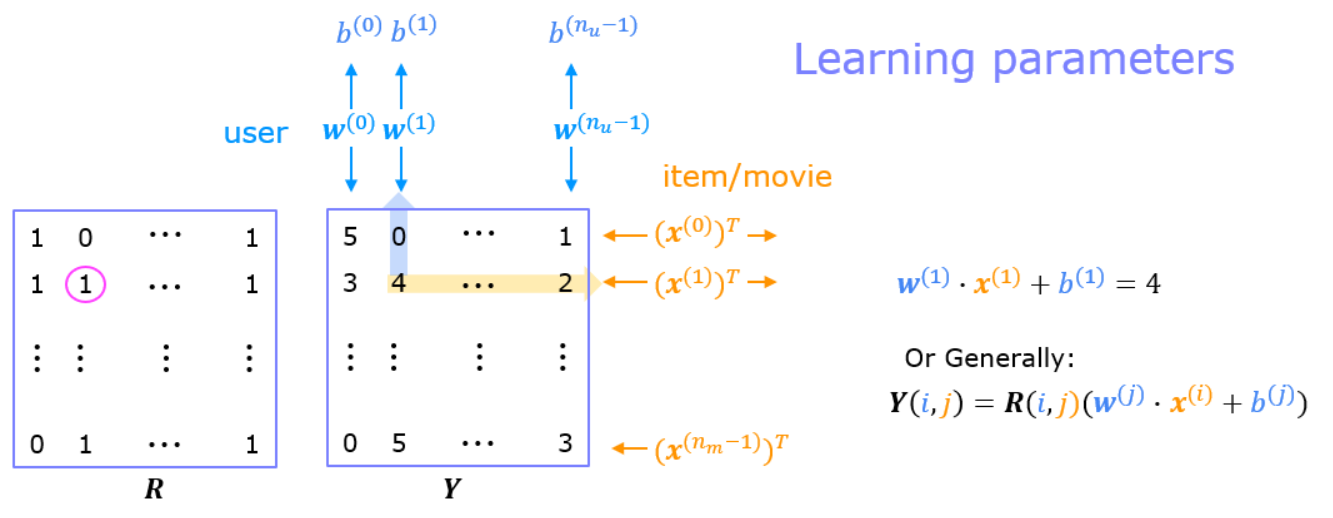

In [16]:
def get_user_vector_basket(rating_df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:

  def encode_values(x):
    if x == 0:
      return 0
    if x > 0:
      return 1

  user_vector = rating_df.groupby(['Place_Id', 'User_Id'])['Place_Ratings']\
                .sum().unstack().reset_index().fillna(0).set_index('Place_Id')

  user_vector_encoded = user_vector.map(encode_values)

  return user_vector, user_vector_encoded

In [17]:
user_vector, user_vector_encoded = get_user_vector_basket(rating_df)
Y = user_vector.to_numpy(copy=True)
R = user_vector_encoded.to_numpy(copy=True)

display(user_vector)
display(user_vector_encoded)

User_Id   1    2    3    4    5    6    7    8    9    10   ...  291  292  \
Place_Id                                                    ...             
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2         0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  3.0   
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4         0.0  0.0  0.0  4.0  3.0  4.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
5         5.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
433       0.0  0.0  0.0  0.0  4.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  0.0   
434       0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
435       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
436       0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  2.0   
437       0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

User_Id   293  294  295  296  297  298  299  300  
Place_Id                                          
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2         0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  
3         0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...       ...  ...  ...  ...  ...  ...  ...  ...  
433       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
434       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
435       0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  
436       0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
437       0.0  0.0  0.0  0.0  4.0  3.0  0.0  0.0  

[437 rows x 300 columns]

User_Id   1    2    3    4    5    6    7    8    9    10   ...  291  292  \
Place_Id                                                    ...             
1           0    0    0    0    0    0    0    0    0    0  ...    0    0   
2           0    1    0    0    0    0    0    0    0    0  ...    0    1   
3           0    0    0    0    0    0    0    0    0    0  ...    0    0   
4           0    0    0    1    1    1    0    0    0    0  ...    0    0   
5           1    0    0    1    0    0    0    0    0    0  ...    0    0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
433         0    0    0    0    1    1    0    1    0    0  ...    0    0   
434         0    0    0    0    1    0    0    0    0    0  ...    0    0   
435         0    0    0    0    0    0    0    0    0    0  ...    0    0   
436         0    0    0    0    1    0    0    0    0    0  ...    0    1   
437         0    1    0    0    0    0    0    0    0    0  ...    0    0   

User_Id   293  294  295  296  297  298  299  300  
Place_Id                                          
1           0    0    0    0    0    0    0    0  
2           0    0    1    0    0    0    0    0  
3           0    0    1    0    0    0    0    0  
4           0    0    0    0    0    0    0    0  
5           0    0    0    0    0    0    0    0  
...       ...  ...  ...  ...  ...  ...  ...  ...  
433         0    0    0    0    0    0    0    0  
434         0    0    0    0    0    0    0    0  
435         0    0    0    0    0    0    0    1  
436         0    1    0    0    0    0    0    0  
437         0    0    0    0    1    1    0    0  

[437 rows x 300 columns]

In [18]:
def normalizeRatings(Y, R):
    Y_mean = (np.sum(Y * R,axis=1) / (np.sum(R, axis=1)+1e-12)).reshape(-1,1)
    Y_norm = Y - np.multiply(Y_mean, R)
    return(Y_norm, Y_mean)

# Normalize the Dataset
Y_norm, Y_mean = normalizeRatings(Y, R)

# **Collaborative Filtering Baseline**

In [19]:
# def collaborative_filtering(X, W, b, id = None):
#   if id is not None:
#     return tf.matmul(X, tf.reshape(W[id], (-1, 1))) + b[:, id]
#   else:
#     return tf.matmul(X, W, transpose_b=True) + b

In [20]:
# def cofi_cost_function(X, W, R, Y_true, Y_pred, lambda_):
#   """
#   Returns the cost for the content-based filtering
#   Vectorized for speed. Uses tensorflow operations to be compatible with custom training loop.
#   Args:
#     X (ndarray (num_movies,num_features)): matrix of item features
#     W (ndarray (num_users,num_features)): matrix of user parameters
#     R (ndarray (num_movies,num_users): matrix, where R(i, j) = 1 if the i-th movies was rated by the j-th user
#     Y_true (ndarray (num_movies,num_users): matrix of user ratings of movies
#     Y_pred (ndarray (num_movies,num_users): prediction matrix of user ratings of movies
#     lambda_ (float): regularization parameter
#   Returns:
#     cost (float) : Cost
#   """
#   loss = (Y_pred - Y_true) * R
#   cost = 0.5 * tf.reduce_sum(loss**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
#   return cost

In [21]:
# #  Useful Values
# num_spots, num_users = Y.shape
# num_features = 100

# # Set Initial Parameters (W, X, b), use tf.Variable to track these variables
# tf.random.set_seed(1234) # for consistent results
# W = tf.Variable(tf.random.normal((num_users, num_features), dtype=tf.float32), name='W')
# X = tf.Variable(tf.random.normal((num_spots, num_features), dtype=tf.float32), name='X')
# b = tf.Variable(tf.random.normal((1,         num_users),    dtype=tf.float32), name='b')

# # Instantiate an optimizer.
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)

In [22]:
# # Pastikan semua tensor menggunakan float32 sejak awal
# Y_norm = tf.constant(Y_norm, dtype=tf.float32)
# lambda_ = tf.constant(1.0, dtype=tf.float32)

In [23]:
# epochs = 500

# for epoch in range(1, epochs + 1):
#     # Use TensorFlow’s GradientTape
#     # to record the operations used to compute the cost
#     with tf.GradientTape() as tape:

#         # Predict the user ratings
#         Y_pred = collaborative_filtering(X, W, b)

#         # Compute the cost (forward pass included in cost)
#         cost_value = cofi_cost_function(X, W, R, Y_norm, Y_pred, lambda_)

#     # Use the gradient tape to automatically retrieve
#     # the gradients of the trainable variables with respect to the loss
#     grads = tape.gradient( cost_value, [X,W,b] )

#     # Run one step of gradient descent by updating
#     # the value of the variables to minimize the loss.
#     optimizer.apply_gradients( zip(grads, [X,W,b]) )

#     # Log periodically.
#     if epoch % 20 == 0:
#       print(f"Training loss at epoch {epoch}: {cost_value:0.1f}")

In [24]:
# # Make a prediction using trained weights and biases
# def get_recommendations(X, W, b, user_id: int):
#   my_pred = collaborative_filtering(X, W, b, user_id)
#   my_pred = my_pred + Y_mean # restore the mean
#   my_pred = tf.reshape(my_pred, (-1))

#   # sort predictions
#   ix = tf.argsort(my_pred, direction='DESCENDING')

#   return ix, my_pred

# # Print recommendations
# def print_recommendations(ix, my_pred, num_recom):
#   for i, tourist_spots_idx in enumerate(ix):
#     if i == num_recom:
#       break
#     j = tourist_spots_idx.numpy()
#     print(f'Predicting rating {my_pred[j]:0.2f} for {tourism_df.loc[j, "Place_Name"]}')

In [25]:
# # Print `n` recommendations for `user_id`
# user_id = 50
# num_recom = 20

# ix, my_pred = get_recommendations(X, W, b, user_id)
# print_recommendations(ix, my_pred, num_recom)

In [26]:
# print(X.shape)
# print(W.shape)
# print(b.shape)

# # Save 3 tensor variables
# tf.saved_model.save(X, 'X_tensor')
# tf.saved_model.save(W, 'W_tensor')
# tf.saved_model.save(b, 'b_tensor')

In [27]:
# # Load 3 tensor variables
# X_from_file = tf.saved_model.load('X_tensor')
# W_from_file = tf.saved_model.load('W_tensor')
# b_from_file = tf.saved_model.load('b_tensor')

In [28]:
# # Test recommendations using loaded Tensor
# user_id = 50
# num_recom = 20

# ix, my_pred = get_recommendations(X_from_file, W_from_file, b_from_file, user_id)
# print_recommendations(ix, my_pred, num_recom)

In [29]:
# Tidak bisa
# !tensorflowjs_converter --input_format=tf_saved_model X_tensor ./
# !tensorflowjs_converter --input_format=tf_saved_model W_tensor ./
# !tensorflowjs_converter --input_format=tf_saved_model b_tensor ./

# **Collaborative Filtering Layer**

## **Custom Layer**

In [52]:
@keras.saving.register_keras_serializable(package='CoFilayer')
class CollaborativeFilteringLayer(tf.keras.layers.Layer):

  def __init__(self, num_users, num_tourism, num_features, **kwargs):
    super(CollaborativeFilteringLayer, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_tourism = num_tourism
    self.num_features = num_features

    self.X = self.add_weight(
      shape=(self.num_tourism, self.num_features),
      initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=tf.random.set_seed(42)),
      dtype=tf.float32,
      trainable=True,
      name='X'
    )

    self.W = self.add_weight(
      shape=(self.num_users, self.num_features),
      initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=tf.random.set_seed(42)),
      dtype=tf.float32,
      trainable=True,
      name='W'
    )

    self.b = self.add_weight(
      shape=(1, self.num_users),
      initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=tf.random.set_seed(42)),
      dtype=tf.float32,
      trainable=True,
      name='b'
    )

  def call(self, inputs):
    if tf.math.equal(inputs, tf.constant(-1, dtype=tf.int32)):  # inputs = id
      return tf.matmul(self.X, self.W, transpose_b=True) + self.b
    else:
      return tf.matmul(self.X, tf.reshape(self.W[inputs], (-1, 1))) + self.b[:, inputs]

  def get_config(self):
    # config = super(CollaborativeFilteringLayer, self).get_config()
    config = super().get_config()
    config.update({
        'num_users': self.num_users,
        'num_tourism': self.num_tourism,
        'num_features': self.num_features
    })
    return config

  @classmethod
  def from_config(cls, config):
    return cls(**config)

## **Custom Model**

In [53]:
# Define the custom model
@keras.saving.register_keras_serializable(package='CoFiModel')
class CollaborativeFilteringModel(tf.keras.Model):
  def __init__(self, num_users, num_tourism, num_features, name="collaborative_filtering", **kwargs):
    super(CollaborativeFilteringModel, self).__init__(name=name, **kwargs)
    self.num_users = num_users
    self.num_tourism = num_tourism
    self.num_features = num_features
    self.collaborative_filtering = CollaborativeFilteringLayer(num_users, num_tourism, num_features)

  def call(self, inputs):
    return self.collaborative_filtering(inputs)

  def get_config(self):
    config = super().get_config()
    config.update({
        'num_users': self.num_users,
        'num_tourism': self.num_tourism,
        'num_features': self.num_features
    })
    return config

  @classmethod
  def from_config(cls, config):
    return cls(**config)

In [55]:
def cofi_cost_function(X, W, R, Y_true, Y_pred, lambda_):
  loss = (Y_pred - Y_true) * R
  cost = 0.5 * tf.reduce_sum(loss**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
  return cost

## **Training**

In [56]:
# Importance variables
num_tourism, num_users = Y.shape
num_features = 64

# instantiate collaborative filtering and the optimizer
cofi = CollaborativeFilteringModel(num_users, num_tourism, num_features)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)

In [57]:
inputs = tf.constant(-1, dtype=tf.int32)
epochs = 500

# Pastikan semua tensor menggunakan float32 sejak awal
Y_norm = tf.constant(Y_norm, dtype=tf.float32)
lambda_ = tf.constant(1.0, dtype=tf.float32)

for epoch in range(1, epochs + 1):
    # Use TensorFlow’s GradientTape
    # to record the operations used to compute the cost
    with tf.GradientTape() as tape:

        # Predict all the user ratings
        Y_pred = cofi(inputs)

        # Compute the cost (forward pass included in cost)
        cost_value = cofi_cost_function(cofi.layers[0].X, cofi.layers[0].W, R, Y_norm, Y_pred, lambda_)

    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss
    grads = tape.gradient( cost_value, [cofi.layers[0].X, cofi.layers[0].W, cofi.layers[0].b] )

    # Run one step of gradient descent by updating
    # the value of the variables to minimize the loss.
    optimizer.apply_gradients( zip(grads, [cofi.layers[0].X, cofi.layers[0].W, cofi.layers[0].b]) )

    # Log periodically.
    if epoch % 20 == 0:
      print(f"Training loss at epoch {epoch}: {cost_value:0.1f}")

Training loss at epoch 20: 16646.1
Training loss at epoch 40: 7695.5
Training loss at epoch 60: 4616.0
Training loss at epoch 80: 3257.0
Training loss at epoch 100: 2558.1
Training loss at epoch 120: 2164.8
Training loss at epoch 140: 1930.5
Training loss at epoch 160: 1784.0
Training loss at epoch 180: 1687.8
Training loss at epoch 200: 1621.8
Training loss at epoch 220: 1574.8
Training loss at epoch 240: 1540.2
Training loss at epoch 260: 1514.1
Training loss at epoch 280: 1494.0
Training loss at epoch 300: 1478.3
Training loss at epoch 320: 1465.8
Training loss at epoch 340: 1455.8
Training loss at epoch 360: 1447.7
Training loss at epoch 380: 1441.0
Training loss at epoch 400: 1435.6
Training loss at epoch 420: 1431.1
Training loss at epoch 440: 1427.3
Training loss at epoch 460: 1424.2
Training loss at epoch 480: 1421.6
Training loss at epoch 500: 1419.4


## **Prediction**

In [58]:
# Make a prediction using trained weights and biases
def get_recommendations(cofi_layer, user_id):
  user_id = tf.constant(user_id, dtype=tf.int32)
  my_pred = cofi_layer(user_id)
  my_pred = my_pred + Y_mean # restore the mean
  my_pred = tf.reshape(my_pred, (-1))

  # sort predictions
  ix = tf.argsort(my_pred, direction='DESCENDING')

  return ix, my_pred

# Print recommendations
def print_recommendations(ix, my_pred, num_recom):
  for i, tourist_spots_idx in enumerate(ix):
    if i == num_recom:
      break
    j = tourist_spots_idx.numpy()
    print(f'Predicting rating {my_pred[j]:0.2f} for {tourism_df.loc[j, "Place_Name"]}')

In [59]:
# Print 20 recommendations
user_id = 120
num_recom = 20

ix, my_pred = get_recommendations(cofi, user_id)
print_recommendations(ix, my_pred, num_recom)

Predicting rating 4.84 for Klenteng Jin De Yuan
Predicting rating 4.79 for Atlantis Land Surabaya
Predicting rating 4.76 for Pura Giri Natha
Predicting rating 4.73 for Museum Sumpah Pemuda
Predicting rating 4.32 for Monumen Yogya Kembali
Predicting rating 4.30 for Keraton Surabaya
Predicting rating 4.28 for Bunker Kaliadem Merapi
Predicting rating 4.16 for Monumen Nasional
Predicting rating 4.15 for Stone Garden Citatah
Predicting rating 4.15 for Curug Tilu Leuwi Opat
Predicting rating 4.14 for Plaza Indonesia
Predicting rating 4.14 for Sumur Gumuling
Predicting rating 4.08 for La Kana Chapel
Predicting rating 4.07 for Ocean Ecopark
Predicting rating 4.05 for Kampung Cina
Predicting rating 4.04 for Umbul Sidomukti
Predicting rating 4.01 for Monumen Jalesveva Jayamahe
Predicting rating 3.99 for Desa Wisata Rumah Domes Teletubbies
Predicting rating 3.96 for Hutan Wisata Tinjomoyo Semarang
Predicting rating 3.94 for Wisata Agro Edukatif Istana Susu Cibugary


## **Save and Load Model**

In [60]:
# # Test save and load weights
# cofi.save_weights('test.weights.h5')

# cofi_test = CollaborativeFilteringModel(num_users, num_tourism, num_features)
# cofi_test.load_weights('test.weights.h5')

# user_id = 120
# num_recom = 20

# ix, my_pred = get_recommendations(cofi_test, user_id)
# print_recommendations(ix, my_pred, num_recom)

In [61]:
# # Test clone model
# new_model = keras.models.clone_model(cofi)
# new_model.load_weights('test.weights.h5')

# user_id = 120
# num_recom = 20

# ix, my_pred = get_recommendations(new_model, user_id)
# print_recommendations(ix, my_pred, num_recom)

In [62]:
# # Test save model architecture via config JSON
# config = keras.saving.serialize_keras_object(cofi)
# display(config)

# new_reg = keras.saving.deserialize_keras_object(config)
# new_reg.load_weights('test.weights.h5')

# user_id = 120
# num_recom = 20

# ix, my_pred = get_recommendations(new_reg, user_id)
# print_recommendations(ix, my_pred, num_recom)

In [63]:
# tf.saved_model.save(cofi, '/my_model')
# reconstructed_cofi_model = tf.saved_model.load('/my_model')

# # reconstructed_cofi_model = tf.keras.models.load_model("my_model.h5", custom_objects={
# #     'CollaborativeFilteringModel': CollaborativeFilteringModel,
# #     'CollaborativeFilteringLayer': CollaborativeFilteringLayer
# # })

# user_id = 120
# num_recom = 20

# # ix, my_pred = get_recommendations(reconstructed_cofi_model, user_id)
# # print_recommendations(ix, my_pred, num_recom)

In [ ]:
cofi.save("collaborative_filtering_ml.h5")
reconstructed_cofi_model = tf.keras.models.load_model("collaborative_filtering_ml.h5", custom_objects={
    'CollaborativeFilteringModel': CollaborativeFilteringModel,
    'CollaborativeFilteringLayer': CollaborativeFilteringLayer
})

user_id = 120
num_recom = 20

ix, my_pred = get_recommendations(reconstructed_cofi_model, user_id)
print_recommendations(ix, my_pred, num_recom)

Predicting rating 4.84 for Klenteng Jin De Yuan
Predicting rating 4.79 for Atlantis Land Surabaya
Predicting rating 4.76 for Pura Giri Natha
Predicting rating 4.73 for Museum Sumpah Pemuda
Predicting rating 4.32 for Monumen Yogya Kembali
Predicting rating 4.30 for Keraton Surabaya
Predicting rating 4.28 for Bunker Kaliadem Merapi
Predicting rating 4.16 for Monumen Nasional
Predicting rating 4.15 for Stone Garden Citatah
Predicting rating 4.15 for Curug Tilu Leuwi Opat
Predicting rating 4.14 for Plaza Indonesia
Predicting rating 4.14 for Sumur Gumuling
Predicting rating 4.08 for La Kana Chapel
Predicting rating 4.07 for Ocean Ecopark
Predicting rating 4.05 for Kampung Cina
Predicting rating 4.04 for Umbul Sidomukti
Predicting rating 4.01 for Monumen Jalesveva Jayamahe
Predicting rating 3.99 for Desa Wisata Rumah Domes Teletubbies
Predicting rating 3.96 for Hutan Wisata Tinjomoyo Semarang
Predicting rating 3.94 for Wisata Agro Edukatif Istana Susu Cibugary


In [83]:
reconstructed_cofi_model(tf.constant(120, dtype=tf.int32))

<tf.Tensor: shape=(437, 1), dtype=float32, numpy=
array([[ 4.41063225e-01],
       [-2.22993642e-01],
       [-1.89158991e-01],
       [-5.44976294e-01],
       [-1.90174669e-01],
       [-7.97114551e-01],
       [ 2.51299888e-01],
       [ 1.00194597e+00],
       [ 4.38091695e-01],
       [ 2.27383018e-01],
       [ 5.61314881e-01],
       [ 3.59280184e-02],
       [-1.85913205e-01],
       [-5.65502465e-01],
       [-1.30646133e+00],
       [-1.12113781e-01],
       [ 8.32705319e-01],
       [-3.49993676e-01],
       [ 1.06652416e-01],
       [ 4.24878895e-01],
       [-7.35114634e-01],
       [-1.17703629e+00],
       [-7.90482938e-01],
       [ 4.03368294e-01],
       [-4.63562310e-01],
       [-2.09107518e-01],
       [-8.07190239e-01],
       [ 3.48903984e-01],
       [ 9.27396193e-02],
       [ 2.72729248e-01],
       [-9.69471261e-02],
       [-5.16785562e-01],
       [-2.17590734e-01],
       [ 3.19535375e-01],
       [ 3.15082341e-01],
       [-2.89413273e-01],
       [-1.649

In [66]:
!tensorflowjs_converter --input_format=keras my_model.h5 ./

2024-11-29 15:00:34.636390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732892434.671554   11355 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732892434.682086   11355 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [67]:
!zip my_model.zip *.bin model.json

from google.colab import files
files.download("/content/my_model.zip")

updating: group1-shard1of1.bin (deflated 7%)
updating: model.json (deflated 56%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Save and Load Layer**

In [68]:
# config = keras.layers.serialize(cofi)
# weights = cofi.get_weights()

# display(config)
# print(f'{len(weights)} variables founds')

In [69]:
# cofi_weights_file = {
#     0: 'cofi_weights_X.npy',
#     1: 'cofi_weights_W.npy',
#     2: 'cofi_weights_b.npy'
# }

# # Save 3 weights to .npy
# for idx, weight in enumerate(weights):
#   np.save(cofi_weights_file[idx], weight)

# # Save layer config to .json
# with open('cofi_config.json', 'w') as f:
#   json.dump(config, f)

In [70]:
# cofi_weights = list()
# for idx in range(3):
#   cofi_weights.append(np.load(cofi_weights_file[idx]))

# reconstructed_cofi = keras.layers.deserialize(config, custom_objects={'CollaborativeFilteringLayer': CollaborativeFilteringLayer})
# reconstructed_cofi.set_weights(cofi_weights)

In [71]:
# # Print 20 recommendations
# user_id = 120
# num_recom = 20

# ix, my_pred = get_recommendations(reconstructed_cofi, user_id)
# print_recommendations(ix, my_pred, num_recom)

In [72]:
# # Menyimpan nilai variabel menggunakan tf.train.Checkpoint
# checkpoint = tf.train.Checkpoint(X=cofi.X, W=cofi.W, b=cofi.b)
# checkpoint.save('test')

In [73]:
# new_cofi = CollaborativeFilteringLayer(num_users, num_tourism, num_features)
# # new_cofi(tf.constant(-1, dtype=tf.int32))
# check = tf.train.Checkpoint(X=new_cofi.X, W=new_cofi.W, b=new_cofi.b)
# check.restore('test-1').assert_consumed()

# new_cofi.X.assign(check.X)  # Update X
# new_cofi.W.assign(check.W)  # Update W
# new_cofi.b.assign(check.b)  # Update b

In [74]:
# user_id = 150
# num_recom = 20

# ix, my_pred = get_recommendations(new_cofi, user_id)
# print_recommendations(ix, my_pred, num_recom)

In [75]:
# cofi.save('model.h5')

# **Arsip**

In [76]:
# class CollaborativeFiltering(tf.keras.layers.Layer):

#   def __init__(self, num_users, num_spots, num_features, **kwargs):
#     super(CollaborativeFiltering, self).__init__()
#     self.num_users = num_users
#     self.num_spots = num_spots
#     self.num_features = num_features

#     X_init_val = tf.random.normal((self.num_spots, self.num_features), dtype=tf.float32)
#     self.X = tf.Variable(name='X', initial_value=X_init_val, trainable=True)
#     W_init_val = tf.random.normal((self.num_users, self.num_features), dtype=tf.float32)
#     self.W = tf.Variable(name='W', initial_value=W_init_val, trainable=True)
#     b_init_val = tf.random.normal((1, self.num_users), dtype=tf.float32)
#     self.b = tf.Variable(name='b', initial_value=b_init_val, trainable=True)

#   # def build(self, input_shape):
#     # pass
#     # X_init_val = tf.random.normal((self.num_spots, self.num_features), dtype=tf.float32)
#     # self.X = tf.Variable(name='X', initial_value=X_init_val, trainable=True)
#     # W_init_val = tf.random.normal((self.num_users, self.num_features), dtype=tf.float32)
#     # self.W = tf.Variable(name='W', initial_value=W_init_val, trainable=True)
#     # b_init_val = tf.random.normal((1, self.num_users), dtype=tf.float32)
#     # self.b = tf.Variable(name='b', initial_value=b_init_val, trainable=True)

#   def call(self, inputs=None):
#     # id = inputs
#     return tf.matmul(self.X, self.W, transpose_b=True) + self.b
#     # pred = tf.matmul(self.X, tf.reshape(self.W[id], (-1, 1))) + self.b[:,id]
#     # return pred

#   def get_config(self):
#     config = super().get_config()
#     config.update({
#         'num_users': self.num_users,
#         'num_spots': self.num_spots,
#         'num_features': self.num_features,
#     })
#     return config

In [77]:
# # Define the custom model
# class CollaborativeFilteringModel(tf.keras.Model):
#     def __init__(self, num_users, num_spots, num_features):
#         super(CollaborativeFilteringModel, self).__init__()
#         # Initialize W, X, and b
#         tf.random.set_seed(1234) # for consistent results
#         self.W = tf.Variable(tf.random.normal((num_users, num_features), dtype=tf.float32), name='W')
#         self.X = tf.Variable(tf.random.normal((num_spots, num_features), dtype=tf.float32), name='X')
#         self.b = tf.Variable(tf.random.normal((1, num_users), dtype=tf.float32), name='b')

#     def call(self, inputs):
#         # Here we assume inputs are (Ynorm, R, lambda_)
#         Ynorm, R, lambda_ = inputs
#         cost = cofi_cost_func_v(self.X, self.W, self.b, Ynorm, R, lambda_)
#         return cost

#     def predict(self, id):
#         # Predict ratings: user features (X) and movie features (W)
#         p = tf.matmul(self.X, self.W, transpose_b=True) + self.b
#         pm = p + Ymean
#         my_predictions = pm[:,id]
#         # sort predictions
#         # ix = tf.argsort(my_predictions, direction='DESCENDING')
#         return my_predictions

In [78]:
# # Instantiate the model
# num_spots, num_users = Y.shape  # Dimensions based on Y
# num_features = 100


# # model = CollaborativeFilteringModel(num_users, num_tourist_spots, num_features)
# # inputs = tf.keras.Input(shape=(3,))

# cofi_layer = CollaborativeFiltering(num_users, num_spots, num_features)
# print(cofi_layer.get_config())

# # model = keras.Model(inputs, outputs)

# # Optimizer
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)

In [79]:
# # Custom training loop
# iterations = 1000
# for iter in range(iterations):
#     with tf.GradientTape() as tape:
#         # Compute the cost
#         y_pred = cofi_layer()
#         cost_value = cofi_cost_function(cofi_layer.X, cofi_layer.W, cofi_layer.b, R, Ynorm, y_pred, lambda_)

#     # Calculate gradients
#     grads = tape.gradient(cost_value, [cofi_layer.X, cofi_layer.W, cofi_layer.b])

#     # Apply gradients
#     optimizer.apply_gradients(zip(grads, [cofi_layer.X, cofi_layer.W, cofi_layer.b]))

#     # Log periodically
#     if iter % 20 == 0:
#         print(f"Training loss at iteration {iter}: {cost_value:0.1f}")

In [80]:
# user_id = 50

# prediction = cofi_layer()
# pm = prediction + Ymean
# my_predictions = pm[:,user_id]

# # sort predictions
# ix = tf.argsort(my_predictions, direction='DESCENDING')

# for i, tourist_spots_idx in enumerate(ix):
#   # if i == 10:
#     # break
#   j = tourist_spots_idx.numpy()
#   print(f'Predicting rating {my_predictions[j]:0.2f} for {tourism_df.loc[j, "Place_Name"]}')

# # for i in range(17):
# #     j = ix[i]
# #     if j not in my_rated:
# #         print(f'Predicting rating {my_predictions[j]:0.2f} for movie {movieList[j]}')

# # print('\n\nOriginal vs Predicted ratings:\n')
# # for i in range(len(my_ratings)):
# #     if my_ratings[i] > 0:
# #         print(f'Original {my_ratings[i]}, Predicted {my_predictions[i]:0.2f} for {movieList[i]}')

In [81]:
# id = 0
# id = tf.constant(id, dtype=tf.int64)
# prediction = tf.matmul(cofi_layer.X, tf.reshape(cofi_layer.W[id], (-1, 1))) + cofi_layer.b[:,id]
# pm = prediction + Ymean
# my_predictions = tf.reshape(pm, (-1))

# # sort predictions
# ix = tf.argsort(my_predictions, direction='DESCENDING')

# for i, tourist_spots_idx in enumerate(ix):
#   if i == 10:
#     break
#   j = tourist_spots_idx.numpy()
#   print(f'Predicting rating {my_predictions[j]:0.2f} for {tourism_df.loc[j, "Place_Name"]}')